# Regresión Lineal <a id="topic1"></a>&nbsp;&nbsp;<a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>


## Base de datos Major League Baseball

En el contexto del béisbol de la Major League Baseball (MLB) de los Estados Unidos, se busca determinar si existe una relación entre la cantidad de bateos realizados por un equipo (`numero_bateos`) y la variable dependiente, que corresponde al número de carreras anotadas (`runs`). Esto se logrará mediante un análisis de regresión lineal simple utilizando la base de datos denominada `beisbol`. En el proceso, se destacarán los resultados clave obtenidos a partir del modelo de regresión lineal simple. Además, se realizará un diagnóstico del modelo en el que la variable dependiente será `runs` y la variable independiente será `numero_bateos`.

In [6]:
# Base de datos beisbol MLB
equipos = c("Texas", "Boston", "Detroit", "Kansas", "St.", "New_S.", "New_Y.", "Milwaukee", "Colorado", "Houston", "Baltimore", "Los_An.", "Chicago", "Cincinnati", "Los_P.", "Philadelphia", "Chicago", "Cleveland", "Arizona", "Toronto", "Minnesota", "Florida", "Pittsburgh", "Oakland", "Tampa", "Atlanta", "Washington", "San.F", "San.I", "Seattle")
numero_bateos = c(5659, 5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598, 5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559, 5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421)
runs = c(855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654 , 735, 667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570, 593, 556)
beisbol = data.frame(equipos, numero_bateos, runs)

,equipos,numero_bateos,runs
,<chr>,<dbl>,<dbl>
1,Texas,5659,855
2,Boston,5710,875
3,Detroit,5563,787
4,Kansas,5672,730
5,St.,5532,762
6,New_S.,5600,718


### Visualización de datos

Vamos a iniciar nuestro análisis explorando la relación entre estas dos variables. Esto se llevará a cabo tanto de manera visual, a través de gráficos, como mediante cálculos numéricos que respalden nuestras conclusiones.


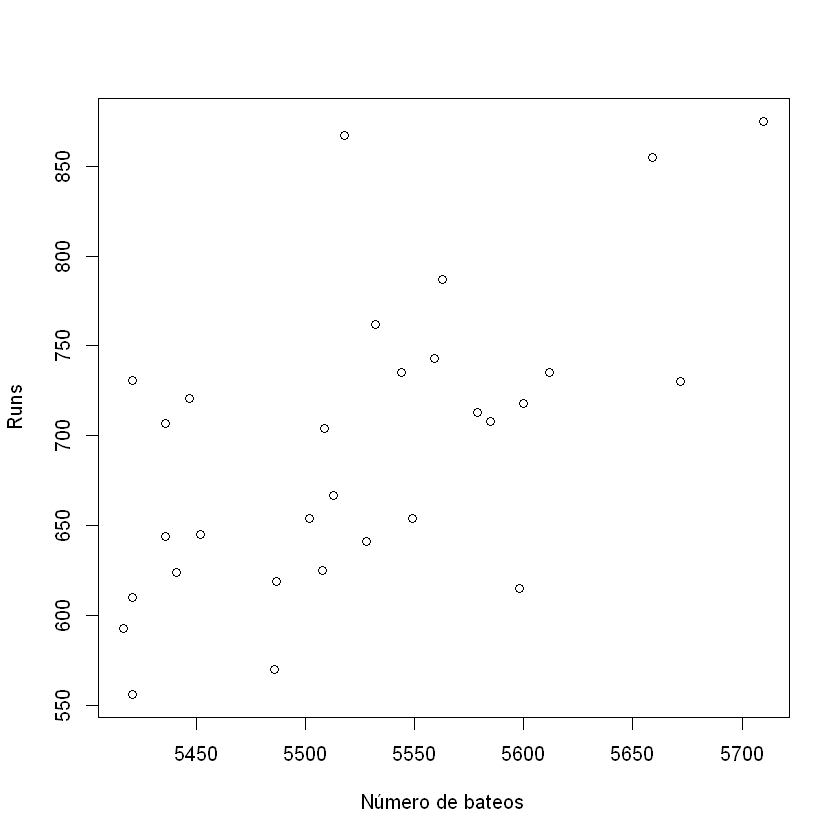

In [4]:
# Representación gráfica para comprobar si existe relación entre variables
plot(beisbol$numero_bateos, beisbol$runs, xlab='Número de bateos', ylab='Runs')

Parece que existe una tendencia donde un aumento en la cantidad de bateos se asocia con un aumento en el número de carreras anotadas. Sin embargo, antes de confirmar la correlación entre estas variables mediante el coeficiente de correlación de Pearson, debemos verificar dos condiciones fundamentales: que ambas variables sigan una distribución normal y que las varianzas sean constantes, es decir, que presenten homocedasticidad.

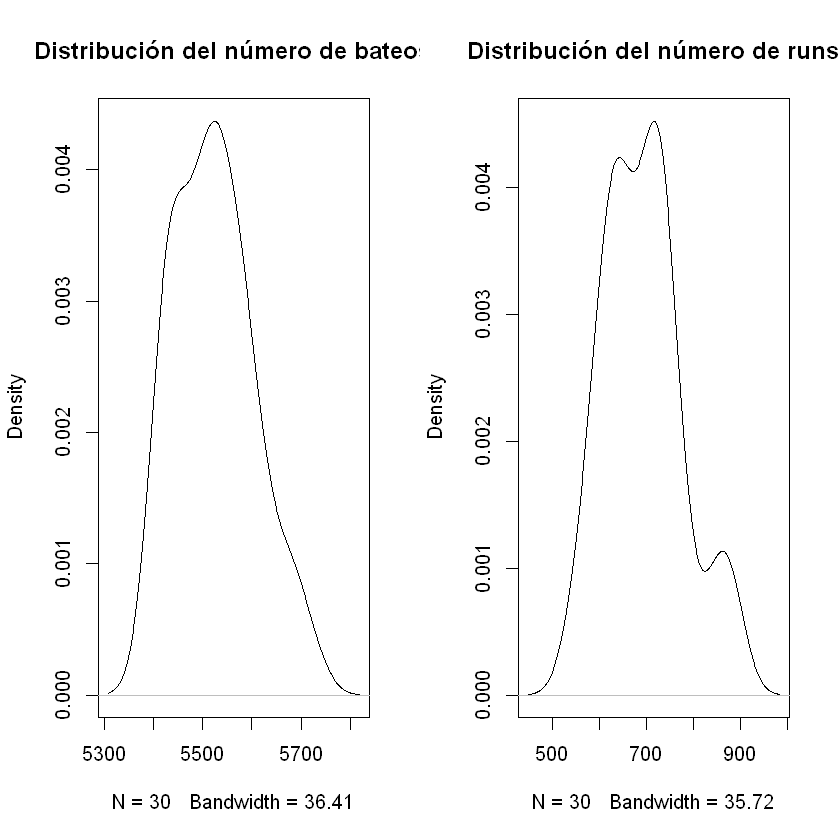

In [5]:
# Representación gráfica para ver si siguen una distribución normal
par(mfrow=c(1, 2))
plot(density(beisbol$numero_bateos), main='Distribución del número de bateos')
plot(density(beisbol$runs), main='Distribución del número de runs')

En lo que respecta a la distribución de la cantidad de bateos, es posible que siga una distribución normal. Sin embargo, la situación es menos evidente en el caso del número de carreras anotadas (runs), cuya distribución no presenta una tendencia clara hacia la normalidad.


### Normalidad y homocedasticidad

In [6]:
# Aplicamos el test de K-S-L para contrastar la normalidad
lillie.test(beisbol$numero_bateos)
lillie.test(beisbol$runs)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  beisbol$numero_bateos
D = 0.11465, p-value = 0.4004



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  beisbol$runs
D = 0.11776, p-value = 0.3583


No obstante, en ambas situaciones, el valor-p obtenido al realizar el test de normalidad K-S-L supera el nivel de significación establecido en $\alpha = 0.05$. En consecuencia, no podemos rechazar la hipótesis nula. Esto nos proporciona evidencia estadística sólida de que ambas muestras se originan en una distribución normal.

In [7]:
# Aplicamos el test de Bartlett para comprobar homocedasticidad 
bartlett.test(list(beisbol$numero_bateos, beisbol$runs))


	Bartlett test of homogeneity of variances

data:  list(beisbol$numero_bateos, beisbol$runs)
Bartlett's K-squared = 0.029381, df = 1, p-value = 0.8639


El valor-p calculado para el test de Bartlett es notablemente elevado, superior al nivel de significación establecido en $\alpha = 0.05$. Por lo tanto, debemos igualmente aceptar la hipótesis nula, que sostiene que las muestras son homocedásticas. Con estos resultados, estamos en condiciones de avanzar hacia el análisis de la correlación entre las variables.

### Correlación de las variables

In [8]:
# Estimamos el coeficiente de correlación de Pearson
cor(beisbol$numero_bateos, beisbol$runs)

[1] 0.610627

El coeficiente de correlación de Pearson obtenido es positivo y tiene un valor relativamente alto, lo que sugiere una posible correlación positiva entre ambas variables. Para verificar esta correlación, procederemos a realizar el contraste de hipótesis correspondiente.

In [9]:
# Realizamos el contraste de correlación
cor.test(beisbol$numero_bateos, beisbol$runs)


	Pearson's product-moment correlation

data:  beisbol$numero_bateos and beisbol$runs
t = 4.0801, df = 28, p-value = 0.0003388
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3209675 0.7958231
sample estimates:
     cor 
0.610627 


En este caso particular, el valor-p obtenido es menor que el nivel de significancia establecido en $\alpha = 0.05$, lo que conduce al rechazo de la hipótesis nula que sostiene la falta de correlación. Este resultado indica que el coeficiente de correlación previamente calculado tiene relevancia estadística. Por lo tanto, podemos afirmar que existe una relación lineal entre ambas variables, lo que respalda la conveniencia de llevar a cabo un análisis de regresión lineal.


### Generación del modelo

In [10]:
# Aplicamos el ajuste de regresión lineal a través de la función lm
ols = lm(runs~numero_bateos, data=beisbol)

# Obtenemos un summary de la salida
output = summary(ols)
output


Call:
lm(formula = runs ~ numero_bateos, data = beisbol)

Residuals:
    Min      1Q  Median      3Q     Max 
-125.58  -47.05  -16.59   54.40  176.87 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -2789.2429   853.6957  -3.267 0.002871 ** 
numero_bateos     0.6305     0.1545   4.080 0.000339 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 66.47 on 28 degrees of freedom
Multiple R-squared:  0.3729,	Adjusted R-squared:  0.3505 
F-statistic: 16.65 on 1 and 28 DF,  p-value: 0.0003388


A continuación, proporcionaremos una síntesis de los resultados obtenidos en el modelo de regresión lineal.

Nombrando $\beta_0$ como la constante y $\beta_1$ como el coeficiente correspondiente a la variable `numero_bateos`, hemos obtenido los valores $\beta_0 = -2789.24$ y $\beta_1 = 0.63$. Además, la tabla proporciona información sobre el error estándar y los valores p de cada parámetro estimado.

Por un lado, el error estándar nos indica cuánto varía el coeficiente a lo largo de diferentes muestras, y lo podríamos calcular a partir de la raíz cuadrada de la diagonal de la matriz de varianzas-covarianzas. En este caso, el error es relativamente alto en comparación con el valor de cada coeficiente.

Por otro lado, observamos que los valores p son menores que el nivel de significancia $\alpha = 0.05$, lo que nos lleva a rechazar la hipótesis nula que sugiere que estos valores son cero. Por lo tanto, podemos concluir que los coeficientes obtenidos son estadísticamente significativos. En resumen, hemos obtenido el siguiente modelo de regresión lineal simple:

$$y = -2789.24 + 0.63x,$$

donde $y$ representa el número de carreras anotadas y $x$ corresponde al número de bateos. En consecuencia, por cada bateo adicional, el número de carreras anotadas aumenta en promedio en 0.63, comenzando desde -2789.24 (ya que lo normal es que se logren varios miles de bateos).```


### Predicciones

Podemos realizar predicciones para nuevos casos utilizando la función de regresión. 


In [22]:
# Obtenemos los resultados de la predicción realizada
predict(ols, data.frame(numero_bateos=5135))

1 
448.6313

### Diagnosis del modelo utilizado

Evaluamos el modelo. Debemos confirmar que los residuos siguen una distribución normal, que el modelo se ajusta apropiadamente a los datos y que no existen observaciones anómalas.


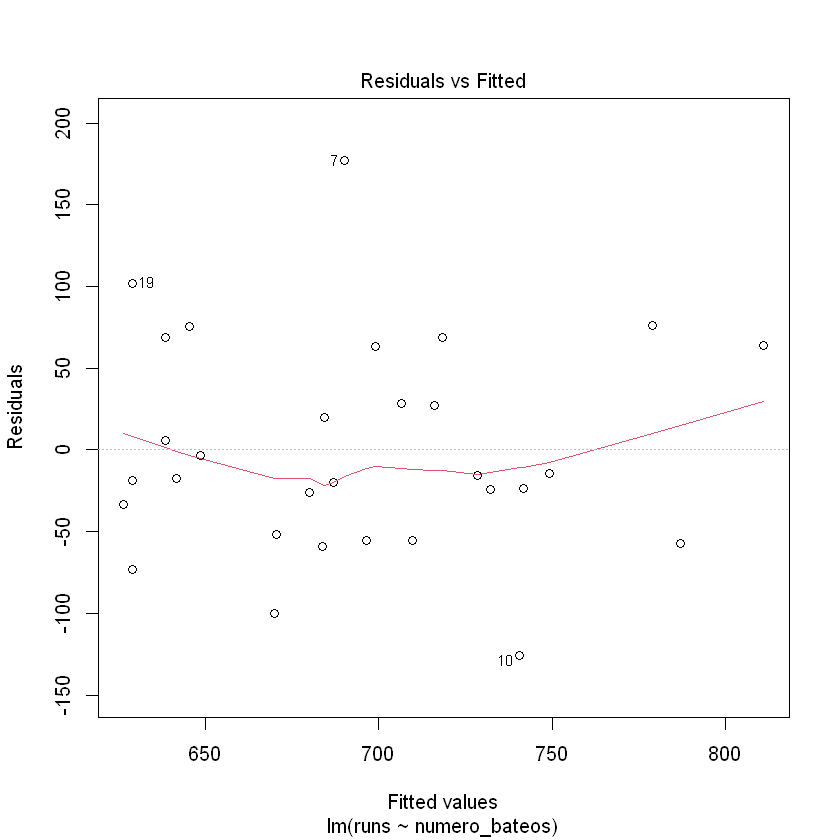

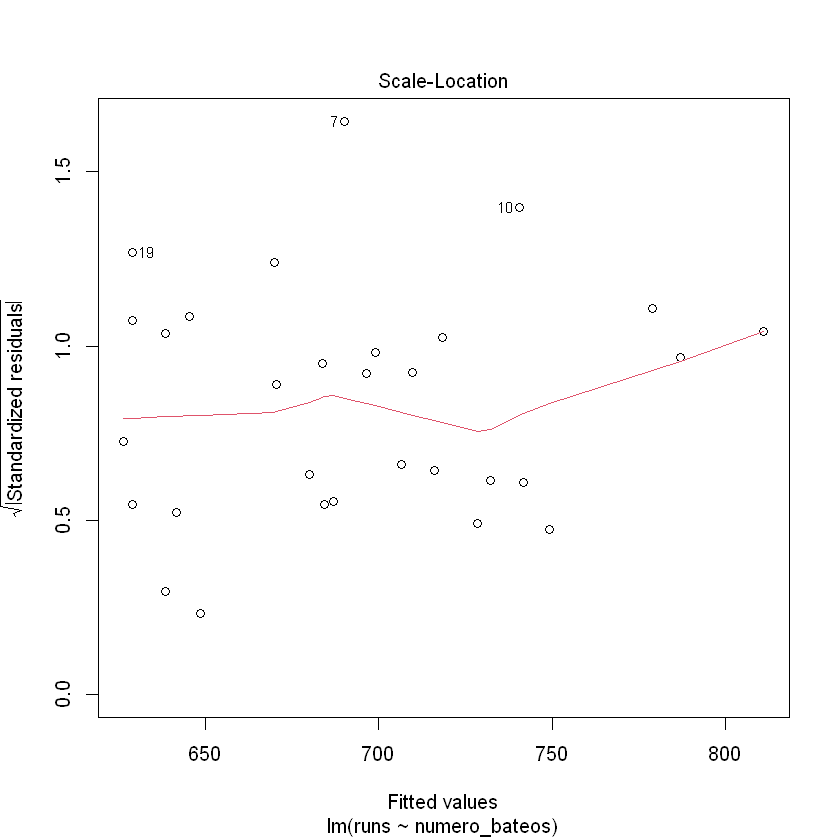

In [23]:
# Comenzamos a realizar la tarea de diagnosis del modelo elegido
plot(ols, which=1)
plot(ols, which=3)

Estas dos primeras gráficas nos permiten decidir si las variables están linealmente relacionadas. Nos muestran para cada valor ajustado el residuo (o residuo estandarizado) que ha generado. Para que las variables de la regresión estén relacionadas no debe haber una relación clara entre estos valores y sus residuos. En este caso no parece que exista esta última relación.

In [24]:
# Obtenemos los resultados del test de Bartlett
bartlett.test(list(ols$fitted.values, eps))


	Bartlett test of homogeneity of variances

data:  list(ols$fitted.values, eps)
Bartlett's K-squared = 1.9054, df = 1, p-value = 0.1675


A través de una prueba de hipótesis, confirmamos que las dispersiones de la variable dependiente ajustada y los residuos son equivalentes, debido a que el valor p observado excede el nivel de significación fijado en α=0.05.

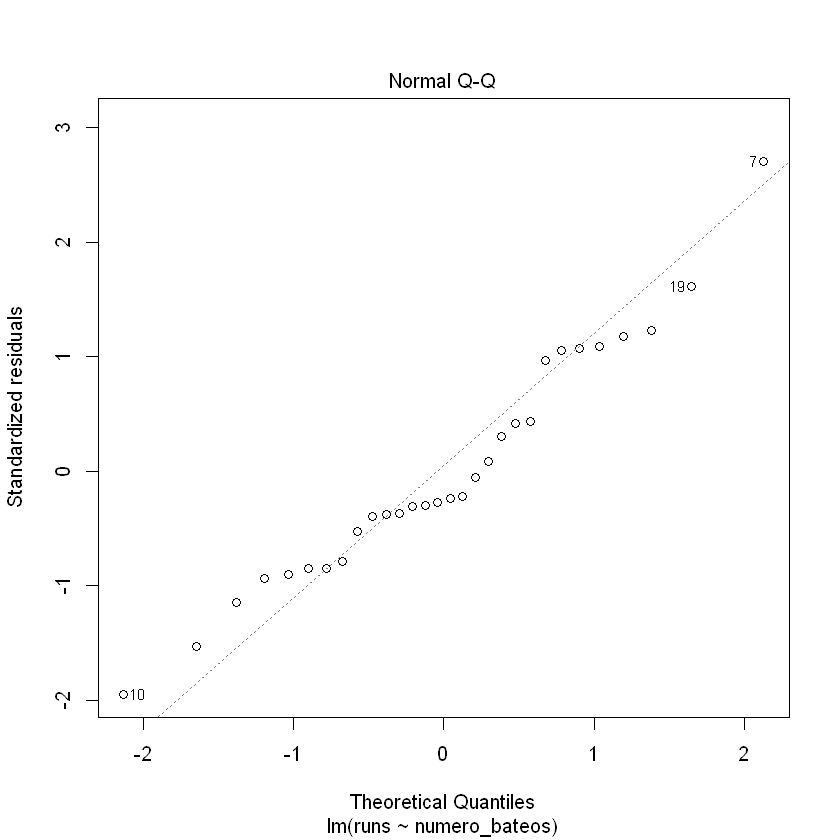

In [25]:
# Obtenemos la gráfica quantil-quantil
plot(ols, which=2)

Mediante una prueba de hipótesis, hemos corroborado que las variabilidades de la variable dependiente ajustada y los residuos son comparables, ya que el valor p obtenido está por encima del nivel de significancia establecido en $α=0.05$.



In [26]:
# Aplicamos el test de K-S-L para contrastar la normalidad
lillie.test(eps)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  eps
D = 0.15393, p-value = 0.06756


El valor-p se encuentra ligeramente por encima del nivel de significación $\alpha = 0.05$, lo que nos lleva a no poder rechazar la hipótesis nula que sugiere que las muestras se originan en una distribución normal.

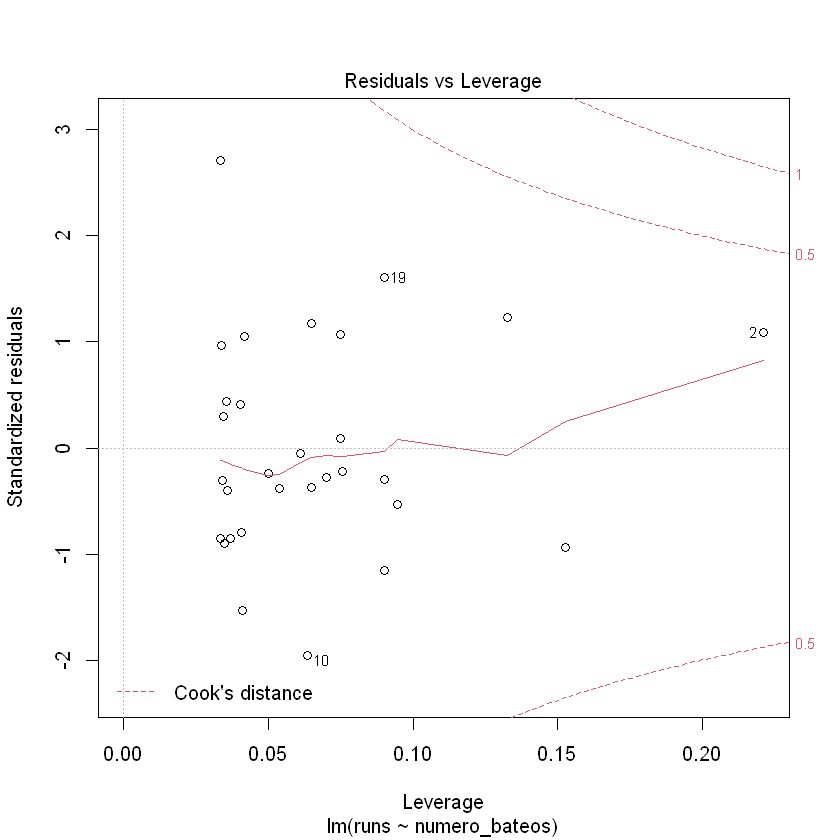

In [27]:
# Obtenemos la gráfica para analizar los outliers
plot(ols, which=5)

Para concluir, esta representación gráfica nos proporciona la capacidad de detectar puntos atípicos, influyentes o que ejercen una influencia significativa en el modelo. Los puntos influyentes son aquellos que tienen un fuerte impacto en los parámetros del modelo y se identifican al estar situados más allá de las líneas de Cook. En este escenario, no hemos encontrado ningún punto influyente. Los puntos atípicos presentan residuos con valores excepcionalmente altos, mientras que los puntos de efecto palanca no se ajustan de manera efectiva a las predicciones del modelo. Ambos tipos de puntos se caracterizan por tener un alto grado de leverage (efecto palanca), pero los primeros exhiben residuos negativos notablemente bajos, mientras que los segundos presentan residuos positivos muy elevados. El único punto que podría encajar en estas categorías es el punto etiquetado como '2', el cual podría ser una fuente de efecto palanca en el análisis.
